In [1]:
# Data Analysis
import warnings 
warnings.filterwarnings('ignore')
    
import pandas as pd
import numpy as np
import os 
import missingno as msno
import matplotlib.pyplot as plt
    
# Data View
pd.options.display.max_columns = 200

# Import Basic Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    

In [2]:
df_raw= pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 3\\Algerian_forest_fires_dataset_U.csv")
df_raw.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
#Renaming 'Classes' level to numeric values
df_raw['Classes'] =pd.factorize(df_raw['Classes'])[0]
df_raw.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [4]:
#check for missing data
df_raw.isnull().sum().sort_values(ascending = False)

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [5]:
#get summary statistics
df_raw.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,0.508197
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051,0.501994
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000,0.000000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000,1.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000,1.000000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.000000


In [6]:
df_raw.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [7]:
#setup independent and dependent variables
x = df_raw.iloc[:,0:12]
x=x.drop(['year'], axis=1)
y = pd.DataFrame(data=df_raw,columns=['Classes'])

In [8]:
x.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
day,1.000000e+00,5.358691e-17,0.181092,-0.210608,0.063970,-0.097489,0.291751,0.542760,0.568644,0.371489,0.557301
month,5.358691e-17,1.000000e+00,-0.035708,-0.088025,-0.007804,0.145180,-0.040746,-0.007624,-0.006211,-0.011281,-0.009113
Temperature,1.810918e-01,-3.570824e-02,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210
RH,-2.106080e-01,-8.802546e-02,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233
Ws,6.396952e-02,-7.803641e-03,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212
Rain,-9.748921e-02,1.451800e-01,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951
FFMC,2.917513e-01,-4.074604e-02,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707
DMC,5.427601e-01,-7.624391e-03,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551
DC,5.686443e-01,-6.211283e-03,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554
ISI,3.714887e-01,-1.128069e-02,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761


In [9]:
x1 = x.drop(['Temperature', 'DMC', 'ISI', 'BUI'], axis=1)
x1.head()

,day,month,RH,Ws,Rain,FFMC,DC
0,1,6,57,18,0.0,65.7,7.6
1,2,6,61,13,1.3,64.4,7.6
2,3,6,82,22,13.1,47.1,7.1
3,4,6,89,13,2.5,28.6,6.9
4,5,6,77,16,0.0,64.8,14.2


In [10]:
import statsmodels.formula.api as smf
logmodel = smf.logit("Classes ~ day + month + RH + Ws + Rain + FFMC + DMC", data=df_raw).fit()
logmodel.summary()

Optimization terminated successfully.
         Current function value: 0.241027
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Classes   No. Observations:                  122
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            7
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.6522
Time:                        17:09:05   Log-Likelihood:                -29.405
converged:                       True   LL-Null:                       -84.548
Covariance Type:            nonrobust   LLR p-value:                 8.015e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.1806      9.648     -3.854      0.000     -56.090     -18.271
day           -0.0150      0.048     -0.312      0.755      -0.109       0.079
month          0.3219      0.348      0.925      0.355      -0.360       1.004
RH             0.0834      0.041      2.012      0.044       0.002       0.165
Ws            -0.1507      0.143     -1.051      0.293      -0.432       0.130
Rain           1.4957      0.471      3.172      0.002       0.572       2.420
FFMC           0.3794      0.090      4.228      0.000       0.204       0.555
DMC            0.1189      0.075      1.587      0.113      -0.028       0.266
==============================================================================
"""

In [11]:
#VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

x2 = df_raw[['RH', 'Rain', 'FFMC']] #candidate variables

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]

print(vif_data)

  feature        VIF
0     day   6.136936
1   month  37.161618
2      RH  32.226615
3      Ws  37.532035
4    Rain   1.874894
5    FFMC  32.122137
6      DC   4.001990


In [12]:
#2nd iteration model
xf = df_raw[['RH', 'Rain', 'FFMC']] #candidate variables
y = df_raw['Classes']

logmodel_1 = smf.logit("Classes ~ Rain + FFMC", data=df_raw).fit()
logmodel_1.summary()

Optimization terminated successfully.
         Current function value: 0.275440
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Classes   No. Observations:                  122
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.6025
Time:                        17:09:05   Log-Likelihood:                -33.604
converged:                       True   LL-Null:                       -84.548
Covariance Type:            nonrobust   LLR p-value:                 7.505e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.7520      6.612     -4.802      0.000     -44.711     -18.793
Rain           1.4632      0.442      3.313      0.001       0.598       2.329
FFMC           0.3932      0.080      4.908      0.000       0.236       0.550
==============================================================================
"""

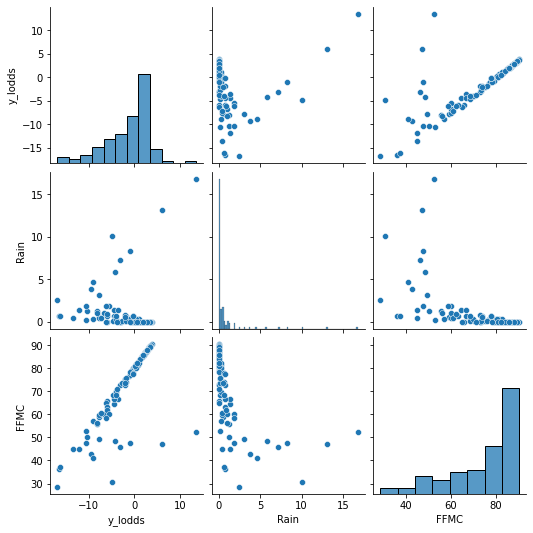

In [13]:
#linear relationship plot
df_raw['y_pred'] = logmodel_1.predict()
y_pred = pd.DataFrame(df_raw['y_pred']) #get probability
odds = y_pred/(1-y_pred)
df_raw['y_lodds'] = np.log(odds)

df_l = df_raw[['y_lodds', 'Rain', 'FFMC']]
sns.pairplot(df_l)

In [14]:
#final model: y=Classes x=Rain, FFMC
xf1 = df_raw[['Rain', 'FFMC']]
y = df_raw['Classes']

logmodel_f = smf.logit("Classes ~ Rain + FFMC", data=df_raw).fit()
logmodel_f.summary()

Optimization terminated successfully.
         Current function value: 0.275440
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Classes   No. Observations:                  122
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.6025
Time:                        17:09:06   Log-Likelihood:                -33.604
converged:                       True   LL-Null:                       -84.548
Covariance Type:            nonrobust   LLR p-value:                 7.505e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.7520      6.612     -4.802      0.000     -44.711     -18.793
Rain           1.4632      0.442      3.313      0.001       0.598       2.329
FFMC           0.3932      0.080      4.908      0.000       0.236       0.550
==============================================================================
"""

In [15]:
#create binary 'y_outcome' variable, split at 0.50
from sklearn.metrics import confusion_matrix

def outcome(x):
    if (x < 0.50):
        return 0
    else:
        return 1
df_raw['y_outcome'] = df_raw['y_pred'].apply(outcome)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    int64  
 14  y_pred       122 non-null    float64
 15  y_lodds      122 non-null    float64
 16  y_outcome    122 non-null    int64  
dtypes: float64(9), int64(8)
memory usage: 16.3 KB


In [16]:
#create confusion matrix
from sklearn import metrics
    
cnf_matrix = metrics.confusion_matrix(df_raw['Classes'], df_raw['y_outcome'])
print(confusion_matrix)

<function confusion_matrix at 0x000001CE38816C10>


Text(0.5, 257.44, 'Predicted label')

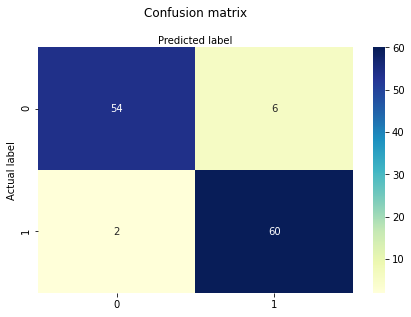

In [17]:
#create confusion matrix heat map
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [18]:
#cross validation
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

xf1 = df_raw[['Rain', 'FFMC']]
logreg=LogisticRegression()
kf=KFold(n_splits=10)
score=cross_val_score(logreg,xf1,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.92307692 1.         0.83333333 0.83333333 1.         0.91666667
 1.         0.66666667 1.         0.91666667]
Average Cross Validation score :0.908974358974359
